In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv('C:\\Users\\simona\\Downloads\\owid-covid-data.csv')


In [106]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387290,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387291,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387292,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387293,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
#dimensioni dataset

In [124]:
print('\nDimensioni del dataset:')
print('Numero di righe:', len(df))
print('Numero di colonne:', len(df.columns))
df.shape


Dimensioni del dataset:
Numero di righe: 368751
Numero di colonne: 68


(368751, 68)

In [ ]:
#info metadati

In [14]:
print('\nInformazioni sui metadati:')
print(df.info())


Informazioni sui metadati:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387295 entries, 0 to 387294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387295 non-null  object 
 1   continent                                   368751 non-null  object 
 2   location                                    387295 non-null  object 
 3   date                                        387295 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                       

In [ ]:
#trovare il totale casi per i continenti

In [114]:
df=df.dropna(subset=['continent'])
total_cases_continent=df.groupby('continent')['total_cases'].sum()
print(total_cases_continent)


continent
Africa           1.277678e+10
Asia             2.099663e+11
Europe           2.013888e+11
North America    1.096626e+11
Oceania          9.506027e+09
South America    6.384417e+10
Name: total_cases, dtype: float64


In [ ]:
#Vengono numeri fuori dal normale, avevo pensato di usare i new_cases ma la consegna richiede i total
#df=df.dropna(subset=['continent'])
#total_cases_continent=df.groupby('continent')['new_cases'].sum()
#print(total_cases_continent)


In [ ]:
#date due variabili di continenti trova:valore massimo, media e % rispetto ai casi tot

In [118]:
asi='Asia'
eu='Europe'

perc=total_cases_continent/total_cases_continent.sum()
stat_continente=df.groupby(["continent"])["total_cases"].agg(["sum", "max", "mean"]).round()

db_merge=pd.concat([perc, stat_continente])
db_merge.columns=['Percentuale_Casi_Totali', 'Casi_totali', 'Max_Casi', 'Media_Casi']

stat_asia=(db_merge.loc[asi])
stat_europa=(db_merge.loc[eu])
print(stat_asia)
print(stat_europa)

           Percentuale_Casi_Totali   Casi_totali    Max_Casi  Media_Casi
continent                                                               
Asia                      0.345826           NaN         NaN         NaN
Asia                           NaN  2.099663e+11  99343195.0   3183043.0
           Percentuale_Casi_Totali   Casi_totali    Max_Casi  Media_Casi
continent                                                               
Europe                    0.331698           NaN         NaN         NaN
Europe                         NaN  2.013888e+11  38997490.0   2669240.0


In [ ]:
#Selezionare i dati relativi all'Italia nel 2022
#Mostrare con un grafico adeguato l'evoluzione dei casi totali 

In [54]:
df.date=pd.to_datetime(df.date)

In [55]:
df.date.dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
387290    2024
387291    2024
387292    2024
387293    2024
387294    2024
Name: date, Length: 368751, dtype: int32

In [58]:
filtro_2022=df.date.dt.year==2022
filtro_ita=df.location=='Italy'

In [59]:
Italia=filtro_2022 & filtro_ita
ita2022=df.loc[Italia]

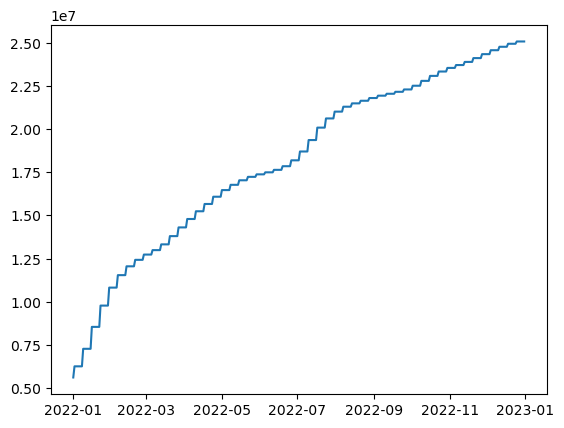

In [63]:
df.loc[Italia]

plt.plot(ita2022['date'], ita2022['total_cases'])
        

In [ ]:
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data.

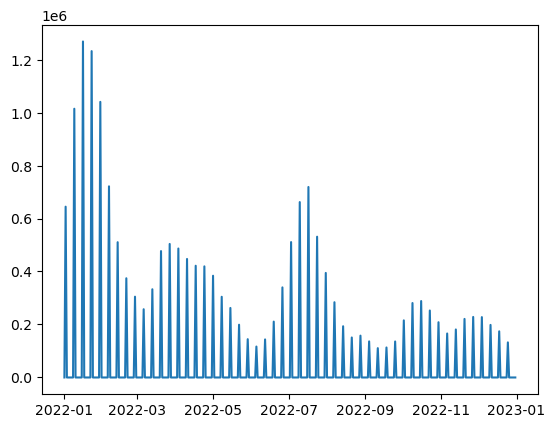

In [64]:
plt.plot(ita2022['date'], ita2022['new_cases'])

In [ ]:
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022
#Commentare se ci sono similarità con l'andamento del numero dei casi totali;

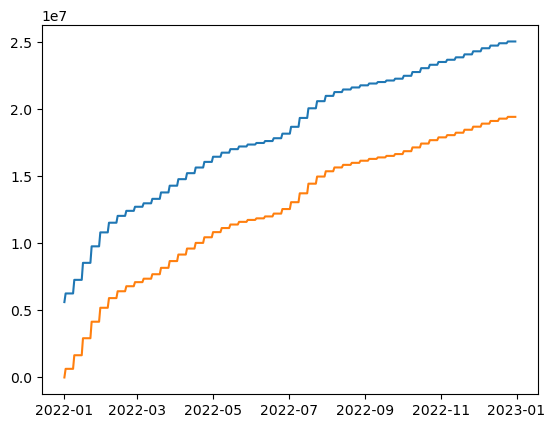

In [134]:
df['progressivo']=df.new_cases.cumsum()
plt.plot(ita2022['date'], ita2022['total_cases'], label='Casi totali')
plt.plot(ita2022['date'], ita_cumul, label='Casi cumulativi')

In [128]:
#all'aumentare dei casi totali in Italia nell'anno 2022 troviamo anche un aumento della somma cumulativa dei nuovi casi nell'anno 2022 ma in una maniera più lenta

In [ ]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#Scrivere un breve commento a riguardo;

In [82]:
filtroita=df.location=='Italy'
filtrofra=df.location=='France'
filtroger=df.location=='Germany'

In [83]:
dati_selezionati=df[((df['location']=='Italy') | (df['location']=='Germany') | (df['location']=='France')) & 
(( df.date.dt.year==2022) & (df.date.dt.month>=5) | (df.date.dt.year==2023) & (df.date.dt.month<=4))]

<Axes: xlabel='icu_patients', ylabel='location'>

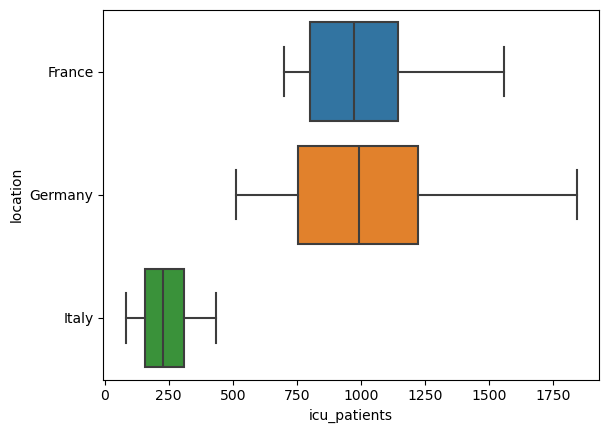

In [86]:
sns.boxplot(data=dati_selezionati, x='icu_patients', y='location')

In [ ]:
#commento: dal grafico emerge che l'italia ha avuto un minor numero di pazienti in terapia intensiva nel periodo selezionato rispetto ai pazienti in terapia intensiva della francia e della germania. Dal grafico emerge inoltre che la germania è quella che ha visto il più alto numero di pazienti in t.i

In [123]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna
#Se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.
igfs_data_2023=df.loc[(df["location"].isin(["Italy", "Germany", "France", "Spain"]))&(df["date"].between("2023-01-01", "2023-12-31"))]
somma_osp_2023=igfs_data_2023.groupby("location")["hosp_patients"].max()
print(somma_osp_2023)

location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64


In [ ]:
#I valori relativi alla Germania sono nulli, io suggerirei di sostituirli usando la variabile weekly_hosp_admissions anche se il numero ottenuto sarà comunque un'approssimazione